<a href="https://colab.research.google.com/github/mralamdari/YOLO/blob/main/Yolo_v8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [ ]:
#install necessary libraries
!pip install awscli
!pip install ultralytics
clear_output()

#Data

In [ ]:
#clone OIDv4_ToolKit
!git clone https://github.com/mralamdari/OIDv4_ToolKit.git

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 499, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 499 (delta 32), reused 52 (delta 31), pack-reused 444
Receiving objects: 100% (499/499), 34.11 MiB | 35.00 MiB/s, done.
Resolving deltas: 100% (189/189), done.


In [ ]:
%cd OIDv4_ToolKit

#Write your desired objects (--classes) and data type (--type_csv)  and the number of images you want (--limit)

!python3 main.py downloader --classes Truck Person Tree --type_csv train --limit 200

/content/OIDv4_ToolKit

		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Truck.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...145%, 0 MB, 41785 KB/s, 0 seconds pass

In [ ]:
!python mralamdari_annotations_converter.py

Currently in subdirectory: train
Converting annotations for class: Tree
100% 200/200 [00:24<00:00,  8.15it/s]
Converting annotations for class: Person
100% 200/200 [00:17<00:00, 11.14it/s]
Converting annotations for class: Truck
100% 200/200 [00:04<00:00, 40.28it/s]


#Detection

In [ ]:
path = '/content/data/obj/train/'
os.makedirs('/content/train/images', exist_ok=True)
os.makedirs('/content/train/labels', exist_ok=True)

for j in os.listdir('/content/data/obj/train/'):
  for i in os.listdir(path+j):
    file_type = 'labels' if i[-4:] == '.txt' else 'images'
    os.rename(path+j+'/'+i, f'/content/train/{file_type}/{i}')

In [ ]:
with open('/content/config.yaml', 'w+') as f:
    config_files = f.write(f"""path: /content/train # dataset root dir
train: images  # train images (relative to 'path')
val: images  # val images (relative to 'path')


# Classes
names:
  0: Truck
  1: Person
  2: Tree""")

In [ ]:
from ultralytics import YOLO

# model = YOLO('yolov8n.pt')
model = YOLO('yolov8n.yaml').load('yolov8n.pt')  # build from YAML and transfer weights

results = model.train(data='/content/config.yaml', epochs=5)


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [ ]:
ggffdfdf
sdkskds
asldasldsl

In [ ]:
# os.makedirs(f'/content/data/train/images/', exist_ok=True)
# os.makedirs(f'/content/data/train/labels/', exist_ok=True)
# os.makedirs(f'/content/data/test/images/', exist_ok=True)
# os.makedirs(f'/content/data/test/labels/', exist_ok=True)


# path = '/content/data/obj/train/'
# DATA_ROOT = '/content/data/'

# VAL_THRESHOLD = 0.2

# for category in os.listdir(path):
#   category_path = path+category

#   for i in os.listdir(category_path):
#     if i[-4:] == '.txt':
#       file_name = i[:-4]
#       image_file = category_path + '/' + file_name + '.jpg'
#       label_file = category_path + '/' + file_name + '.txt'
#       rand_num = np.random.rand()
#       target = 'test' if rand_num <= VAL_THRESHOLD else 'train'
#       os.rename(image_file, f'/content/data/{target}/images/{file_name}.img')
#       os.rename(label_file, f'/content/data/{target}/labels/{file_name}.tx')

# os.rename('/content/data/obj', '/content/obj')
# os.rename('/content/data/obj.names', '/content/obj.names')
# os.rename('/content/data/train.txt', '/content/train.txt')

In [ ]:
# !scp -r runs '/content/drive/MyDrive/Computer Vision Projects/Yolo/'
!scp -r runs '/content/'

In [ ]:
metrics = model.val()  # evaluate model performance on the validation set

Ultralytics YOLOv8.0.149 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients
val: Scanning /content/train/labels.cache... 149 images, 0 backgrounds, 0 corrupt: 100%|██████████| 149/149 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:41<00:00,  4.18s/it]
                   all        149        391      0.785      0.487      0.611      0.415
                 Truck        149        199      0.823      0.257       0.44      0.271
                Person        149        117      0.788      0.504      0.657      0.449
                  Tree        149         75      0.745      0.701      0.736      0.527
Speed: 1.5ms preprocess, 214.3ms inference, 0.0ms loss, 10.9ms postprocess per image
Results saved to runs/detect/val


In [ ]:
results = model("/content/2.jpg")  # predict on an image


image 1/1 /content/2.jpg: 640x448 (no detections), 705.6ms
Speed: 9.7ms preprocess, 705.6ms inference, 14.5ms postprocess per image at shape (1, 3, 640, 448)


In [ ]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 keys: ['boxes']
 masks: None
 names: {0: 'Truck', 1: 'Person', 2: 'Tree'}
 orig_img: array([[[218, 206, 194],
         [218, 206, 194],
         [218, 206, 194],
         ...,
         [220, 208, 197],
         [220, 208, 197],
         [220, 208, 197]],
 
        [[218, 206, 194],
         [218, 206, 194],
         [218, 206, 194],
         ...,
         [220, 208, 197],
         [220, 208, 197],
         [220, 208, 197]],
 
        [[218, 206, 194],
         [218, 206, 194],
         [218, 206, 194],
         ...,
         [220, 208, 197],
         [220, 208, 197],
         [220, 208, 197]],
 
        ...,
 
        [[ 86, 143, 177],
         [104, 160, 195],
         [ 97, 153, 188],
         ...,
         [141, 172, 201],
         [141, 172, 201],
         [151, 182, 211]],
 
        [[ 91, 148, 182],
         [113, 170, 204],
         [ 99, 156, 190],
   

In [ ]:
path = model.export(format="onnx")  # export the model to ONNX format


100%|██████████| 476k/476k [00:00<00:00, 10.0MB/s]
image 1/1 /content/OIDv4_ToolKit/bus.jpg: 640x480 (no detections), 245.5ms
Speed: 5.0ms preprocess, 245.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)
Ultralytics YOLOv8.0.149 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (5.9 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 27.5 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 10.8s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.14.0 opset 17...
ONNX: export success ✅ 13.1s, saved as 'runs/detect/train/weights/best.onnx' (11.7 MB)

Export complete (14.8s)
Results saved to /content/OIDv4_ToolKit/runs/detect/tr

============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



Pre trained

In [ ]:
# Load a model
from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/Computer Vision Projects/Yolo/runs/detect/train5/weights/best.pt")  # load a pretrained model (recommended for training)

# Use the model
model.train(data="coco128.yaml", epochs=3)  # train the model
metrics = model.val()  # evaluate model performance on the validation set

Ultralytics YOLOv8.0.148 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/Computer Vision Projects/Yolo/runs/detect/train5/weights/best.pt, data=coco128.yaml, epochs=3, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchs

In [ ]:
results = model("https://ultralytics.com/images/bus.jpg")  # predict on an image
path = model.export(format="onnx")  # export the model to ONNX format


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/OIDv4_ToolKit/bus.jpg: 640x480 (no detections), 333.9ms
Speed: 5.7ms preprocess, 333.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)
Ultralytics YOLOv8.0.148 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (6.2 MB)

ONNX: starting export with onnx 1.14.0 opset 17...
ONNX: export success ✅ 2.6s, saved as 'runs/detect/train/weights/best.onnx' (12.2 MB)

Export complete (4.7s)
Results saved to /content/OIDv4_ToolKit/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.onnx imgsz=640 
Validate:        yolo val task=detect model=runs/detect/train/weights/best.onnx imgsz=640 data=None 
Visualize:       https://netron.app


============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



#Classification

Adjust dataset for the Classification task only

In [ ]:
labels = ['Tree', 'Person', 'Truck']

for label in labels:
  os.makedirs(f'/content/data/train/{label}', exist_ok=True)
  os.makedirs(f'/content/data/train/{label}', exist_ok=True)

  os.makedirs(f'/content/data/val/{label}', exist_ok=True)
  os.makedirs(f'/content/data/val/{label}', exist_ok=True)

In [ ]:
path = '/content/data/obj/train/'
DATA_ROOT = '/content/data/'

VAL_THRESHOLD = 0.2

for category in os.listdir(path):
  category_path = path+category

  for i in os.listdir(category_path):
    if i[-4:] == '.jpg':
      file_name = i
      image_file = category_path + '/' + i
      rand_num = np.random.rand()
      target = 'val' if rand_num <= VAL_THRESHOLD else 'train'
      os.rename(image_file, f'/content/data/{target}/{category}/{i}')

In [ ]:
os.rename('/content/data/obj', '/content/obj')
os.rename('/content/data/obj.names', '/content/obj.names')
os.rename('/content/data/train.txt', '/content/train.txt')

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n-cls.pt')

results = model.train(data='/content/data', epochs=20)

Ultralytics YOLOv8.0.148 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/data, epochs=20, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simpli

In [ ]:
!scp -r runs '/content/drive/MyDrive/Computer Vision Projects/Yolo/'
!scp -r runs '/content/'

In [ ]:
metrics = model.val()
metrics.top1   # top1 accuracy

Ultralytics YOLOv8.0.148 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:03<00:00,  1.09it/s]
                   all        0.8          1
Speed: 0.0ms preprocess, 16.0ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val2


0.800000011920929

In [ ]:
metrics.top5   # top5 accuracy

1.0

In [ ]:
results = model('/content/blue-truck-homepage-618x340.jpg')  # predict on an image


image 1/1 /content/blue-truck-homepage-618x340.jpg: 224x224 Truck 1.00, Person 0.00, Tree 0.00, 30.6ms
Speed: 1.8ms preprocess, 30.6ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


In [ ]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: None
 keypoints: None
 keys: ['probs']
 masks: None
 names: {0: 'Person', 1: 'Tree', 2: 'Truck'}
 orig_img: array([[[213, 172, 140],
         [211, 170, 138],
         [208, 167, 135],
         ...,
         [223, 203, 186],
         [225, 206, 191],
         [228, 209, 194]],
 
        [[213, 172, 140],
         [210, 169, 137],
         [207, 166, 134],
         ...,
         [225, 205, 188],
         [227, 208, 193],
         [229, 210, 195]],
 
        [[211, 170, 138],
         [209, 168, 136],
         [206, 165, 133],
         ...,
         [229, 209, 192],
         [228, 209, 194],
         [231, 212, 197]],
 
        ...,
 
        [[186, 197, 205],
         [181, 192, 200],
         [179, 190, 198],
         ...,
         [200, 209, 212],
         [198, 207, 210],
         [200, 209, 212]],
 
        [[186, 197, 205],
         [181, 192, 200],
         [180, 191, 199],
         ...,
         [198, 207, 210]

In [ ]:
import matplotlib.pyplot as plt

res = plt.imread('/content/blue-truck-homepage-618x340.jpg')
plt.imshow(res)

#va

In [ ]:
# !pip install fiftyone

# import fiftyone.zoo as foz

# oi_dataset = foz.load_zoo_dataset("open-images-v6", split="validation")

In [ ]:
!wget https://storage.googleapis.com/openimages/v6/oidv6-class-descriptions.csv

!wget https://storage.googleapis.com/openimages/v6/oidv6-train-images-with-labels-with-rotation.csv
!wget https://storage.googleapis.com/openimages/2018_04/validation/validation-images-with-rotation.csv
!wget https://storage.googleapis.com/openimages/2018_04/test/test-images-with-rotation.csv

!wget https://raw.githubusercontent.com/openimages/dataset/master/downloader.py

!wget https://raw.githubusercontent.com/drbillah/openimages/main/image_list.py

In [ ]:
!python /content/image_list.py -c Cattle,Sheep,Goat -d /content/oidv6-class-descriptions.csv -p /content/oidv6-train-images-with-labels-with-rotation.csv
# !python /content/image_list.py -c Cattle,Sheep,Goat -d /content/oidv6-class-descriptions.csv -p /content/validation-images-with-rotation.csv
# !python /content/image_list.py -c Cattle,Sheep,Goat -d /content/oidv6-class-descriptions.csv -p /content/test-images-with-rotation.csv

In [ ]:
!python downloader.py <IMAGE_LIST_FILE> --download_folder <DOWNLOAD_FOLDER> --num_processes <number>

optional arguments:
  -h, --help           show this help message and exit
  --num_processes      Number of parallel processes to use (default is 5).
  --download_folder    Folder where to download the images.

  Example:
python downloader.py train.txt --download_folder /home/lab/myfolder/ --num_processes 5
python downloader.py test.txt --download_folder /home/lab/myfolder/ --num_processes 5
python downloader.py validation.txt --download_folder /home/lab/myfolder/ --num_processes 5

#ddd

In [1]:
import numpy as np
from PIL import Image
from skimage import draw
import random
from pathlib import Path

def create_image(path, img_size, min_radius):
    path.parent.mkdir( parents=True, exist_ok=True )

    arr = np.zeros((img_size, img_size)).astype(np.uint8)
    center_x = random.randint(min_radius, (img_size-min_radius))
    center_y = random.randint(min_radius, (img_size-min_radius))
    max_radius = min(center_x, center_y, img_size - center_x, img_size - center_y)
    radius = random.randint(min_radius, max_radius)

    row_indxs, column_idxs = draw.ellipse(center_x, center_y, radius, radius, shape=arr.shape)

    arr[row_indxs, column_idxs] = 255

    im = Image.fromarray(arr)
    im.save(path)

def create_images(data_root_path, train_num, val_num, test_num, img_size=640, min_radius=10):
    data_root_path = Path(data_root_path)

    for i in range(train_num):
        create_image(data_root_path / 'train' / 'images' / f'img_{i}.png', img_size, min_radius)

    for i in range(val_num):
        create_image(data_root_path / 'val' / 'images' / f'img_{i}.png', img_size, min_radius)

    for i in range(test_num):
        create_image(data_root_path / 'test' / 'images' / f'img_{i}.png', img_size, min_radius)

create_images('datasets', train_num=120, val_num=40, test_num=40, img_size=120, min_radius=10)


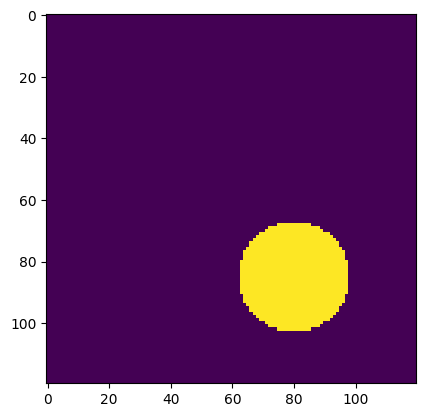

In [5]:
path = '/content/datasets/train/images/img_100.png'

import matplotlib.pyplot as plt
plt.imshow(plt.imread(path))

In [7]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 41.9 MB/s eta 0:00:00


In [8]:
from rasterio import features

def create_label(image_path, label_path):
    arr = np.asarray(Image.open(image_path))

    # There may be a better way to do it, but this is what I have found so far
    cords = list(features.shapes(arr, mask=(arr >0)))[0][0]['coordinates'][0]
    label_line = '0 ' + ' '.join([f'{int(cord[0])/arr.shape[0]} {int(cord[1])/arr.shape[1]}' for cord in cords])

    label_path.parent.mkdir( parents=True, exist_ok=True )
    with label_path.open('w') as f:
        f.write(label_line)

for images_dir_path in [Path(f'datasets/{x}/images') for x in ['train', 'val', 'test']]:
    for img_path in images_dir_path.iterdir():
        label_path = img_path.parent.parent / 'labels' / f'{img_path.stem}.txt'
        label_line = create_label(img_path, label_path)

In [10]:
yaml_content = f'''
train: train/images
val: val/images
test: test/images

names: ['circle']
    '''

with Path('data.yaml').open('w') as f:
    f.write(yaml_content)

In [ ]:
!pip install ultralytics==8.0.38

In [12]:
from ultralytics import YOLO

model = YOLO("yolov8n-seg.pt")

results = model.train(
        batch=8,
        device="cpu",
        data="data.yaml",
        epochs=7,
        imgsz=120,
    )

100%|██████████| 6.73M/6.73M [00:00<00:00, 168MB/s]
Ultralytics YOLOv8.0.38 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
yolo/engine/trainer: task=segment, mode=train, model=yolov8n-seg.yaml, data=data.yaml, epochs=7, patience=50, batch=8, imgsz=120, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, min_memory=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, split=val, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False,

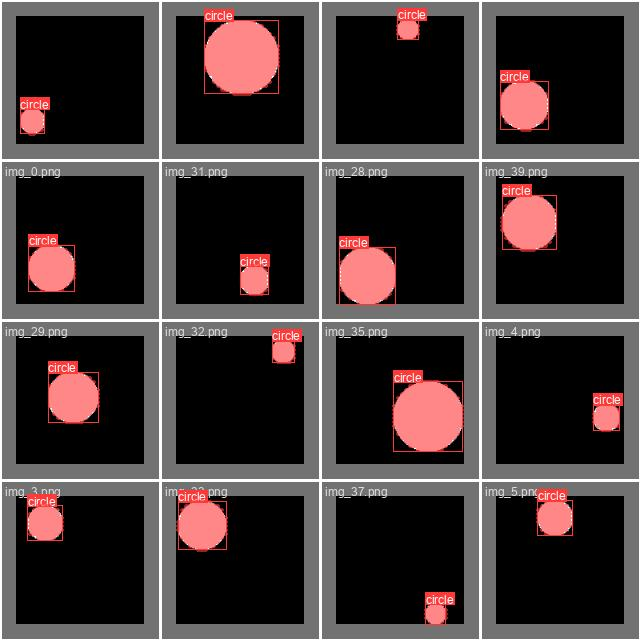

In [15]:
from IPython.display import Image as show_image
show_image(filename="runs/segment/train/val_batch0_labels.jpg")